Generating plots for 6 specific safety factors...

--- Average No Factor Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.258774
                Low Income      0.329201
Roundabout      High Income     2.484994
                Low Income      4.537415
Name: rate_NO_FACTOR, dtype: float64



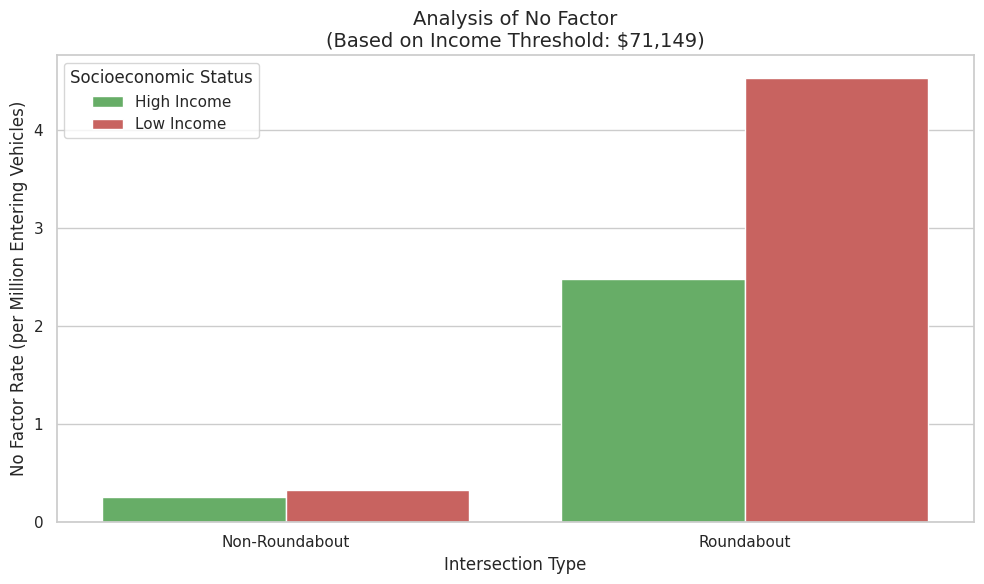

--- Average Distracted Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.028281
                Low Income      0.027392
Roundabout      High Income     0.141903
                Low Income      0.126246
Name: rate_DISTRACTED, dtype: float64



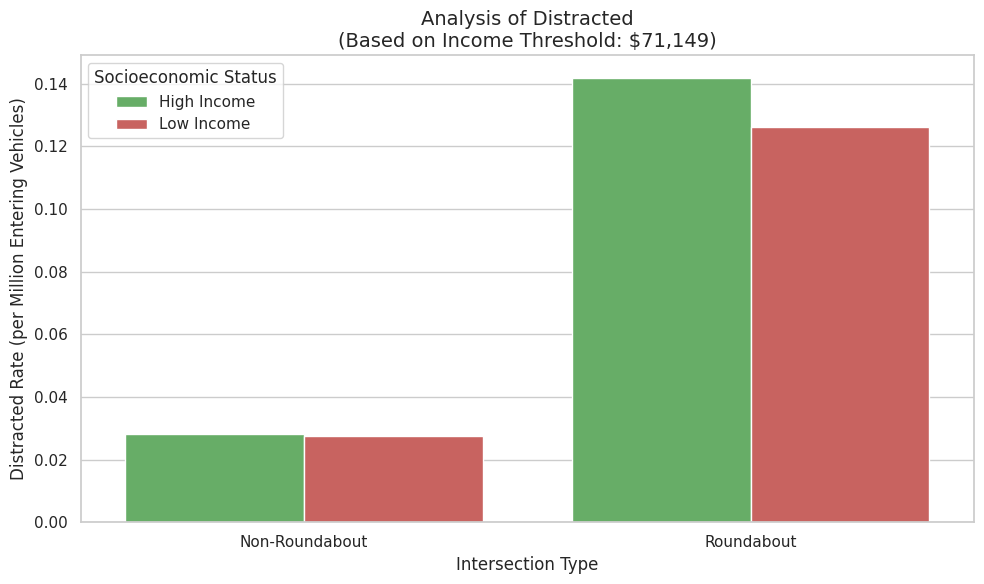

--- Average Drug Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.003513
                Low Income      0.004551
Roundabout      High Income     0.021480
                Low Income      0.020789
Name: rate_DRUG, dtype: float64



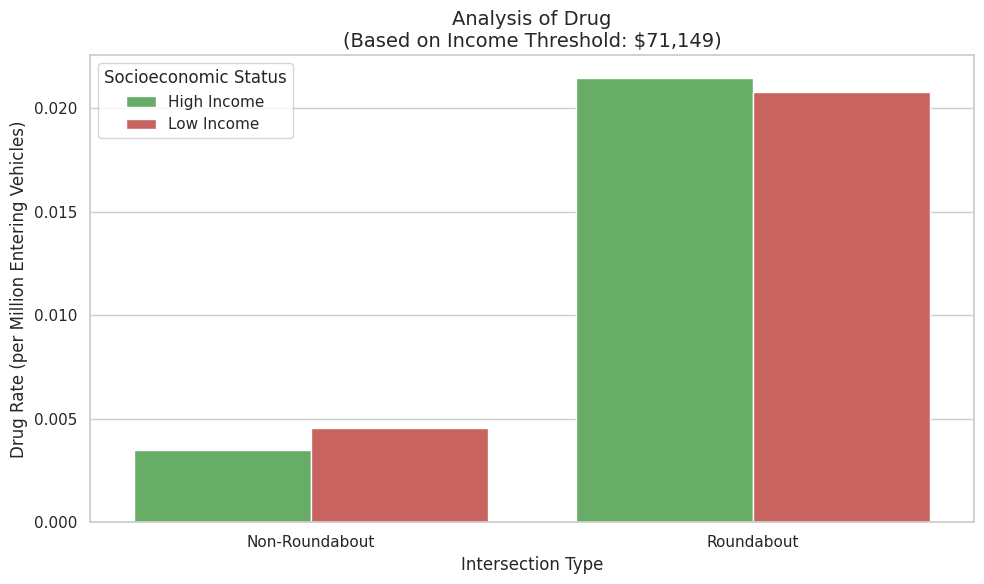

--- Average Alcohol Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.012883
                Low Income      0.017043
Roundabout      High Income     0.073144
                Low Income      0.061149
Name: rate_ALCOHOL, dtype: float64



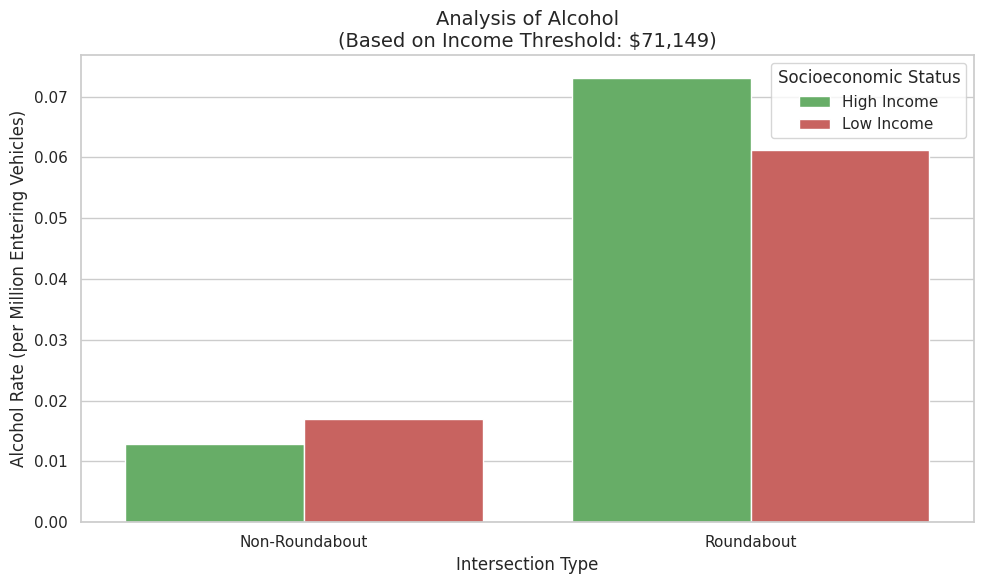

--- Average Speeding Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.025182
                Low Income      0.033581
Roundabout      High Income     0.208781
                Low Income      0.093604
Name: rate_SPEEDING, dtype: float64



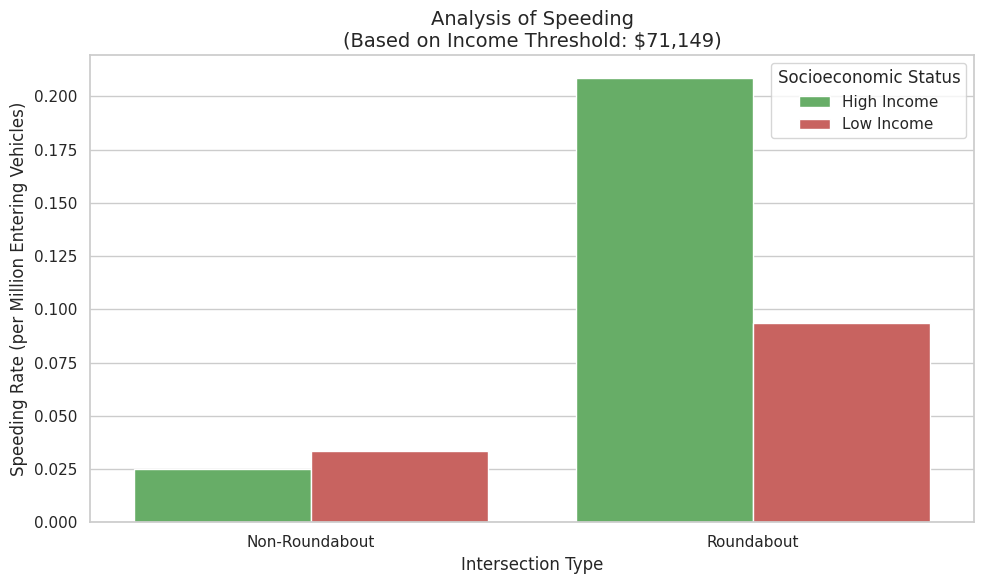

--- Average Hitnrun Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.036474
                Low Income      0.124199
Roundabout      High Income     0.335626
                Low Income      0.693718
Name: rate_HITNRUN, dtype: float64



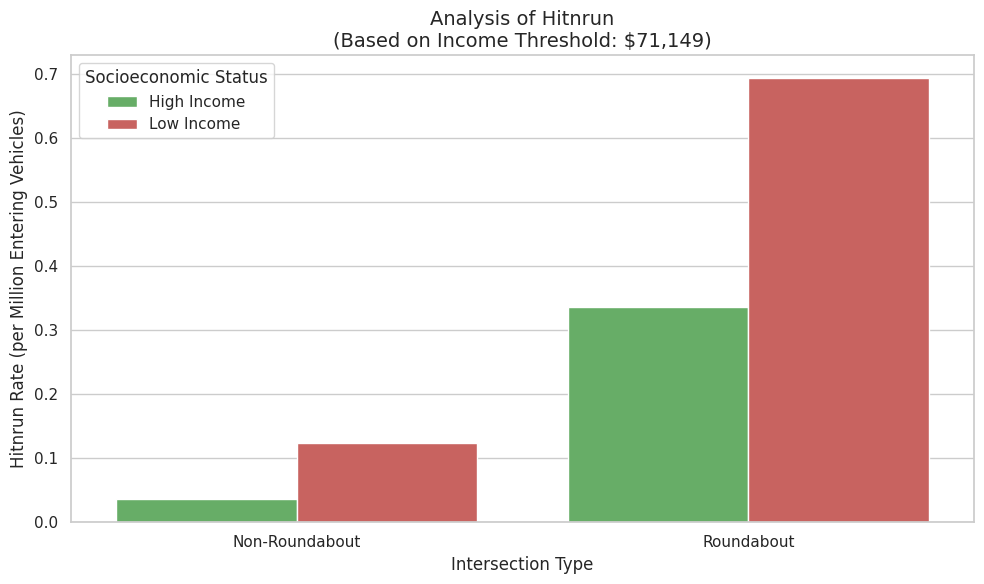

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization style
sns.set(style="whitegrid")

# 1. LOAD AND PREPARE DATA
try:
    df_similar = pd.read_csv('SimilarIntersections_Cleaned.csv') # Corrected filename
    df_roundabouts = pd.read_csv('Roundabouts_Cleaned.csv')
except FileNotFoundError:
    print("Error: CSV files not found. Please ensure they are in the current directory.")

# Tag the intersection types
df_similar['Type'] = 'Non-Roundabout'
df_roundabouts['Type'] = 'Roundabout'

# Merge the datasets
df_all = pd.concat([df_similar, df_roundabouts], ignore_index=True)

# Remove rows where income data is missing
df_all = df_all.dropna(subset=['Median_HH_Income'])


# 2. INCOME CLASSIFICATION
# Using the specific median threshold provided
MEDIAN_INCOME_THRESHOLD = 71149

def classify_income(income):
    if income >= MEDIAN_INCOME_THRESHOLD:
        return 'High Income'
    else:
        return 'Low Income'

df_all['Income_Group'] = df_all['Median_HH_Income'].apply(classify_income)

# 3. DEFINE SPECIFIC FACTORS
target_factors = [
    'rate_NO_FACTOR',
    'rate_DISTRACTED',
    'rate_DRUG',
    'rate_ALCOHOL',
    'rate_SPEEDING',
    'rate_HITNRUN'
]

print(f"Generating plots for {len(target_factors)} specific safety factors...\n")

# 4. GENERATE FIGURES

for factor in target_factors:
    # Initialize a new figure
    plt.figure(figsize=(10, 6))

    # Generate the Bar Chart
    chart = sns.barplot(
        x='Type',
        y=factor,
        hue='Income_Group',
        data=df_all,
        palette={'Low Income': '#d9534f', 'High Income': '#5cb85c'}, # Red vs Green
        errorbar=None
    )

    # Clean up the label name for the title (e.g., "rate_HITNRUN" -> "Hitnrun")
    clean_name = factor.replace('rate_', '').replace('_', ' ').title()

    # Formatting
    plt.title(f'Analysis of {clean_name}\n(Based on Income Threshold: ${MEDIAN_INCOME_THRESHOLD:,})', fontsize=14)
    plt.ylabel(f'{clean_name} Rate (per Million Entering Vehicles)', fontsize=12)
    plt.xlabel('Intersection Type', fontsize=12)
    plt.legend(title='Socioeconomic Status')

    # Print statistics to the console for verification
    avg_rates = df_all.groupby(['Type', 'Income_Group'])[factor].mean()
    print(f"--- Average {clean_name} Rate ---")
    print(avg_rates)
    print("")

    plt.tight_layout()
    plt.show()